In [19]:
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import LabelEncoder
import pickle as pkl
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
from sklearn.model_selection import KFold
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
# from xgboost import XGBRegressor

In [20]:
def get_data():
  full_data = '/Users/taralakdawala/Documents/Carnegie/Junior Year/Fall 2021/MLIP/Untitled Folder/nyc-property-sales.csv'

  data = pd.read_csv(full_data)
  # test = pd.read_csv(test_data)

  return data

In [21]:
data = get_data()
# target,full_set=get_full_set()

# print(data.columns)
LE = LabelEncoder()
data['NEIGHBORHOOD_CODE'] = LE.fit_transform(data['NEIGHBORHOOD'])
# print(data.shape)
data = data.drop(['ID','BOROUGH','NEIGHBORHOOD','BUILDING_CLASS_NAME',
                    'TAX_CLASS_AT_PRESENT',
                    'BUILDING_CLASS_AT_PRESENT','ADDRESS','APARTMENT_NUMBER',
                    'LAND_SQUARE_FEET','GROSS_SQUARE_FEET',
                    'TAX_CLASS_AT_TIME_OF_SALE','BUILDING_CLASS_AT_TIME_OF_SALE'],
                   axis=1)
print(data.head(10))
data=data.dropna()
print(data.shape)


   BUILDING_CLASS  BLOCK   LOT  ZIP_CODE  RESIDENTIAL_UNITS  COMMERCIAL_UNITS  \
0              10    732    16     10001                0.0               0.0   
1              13    805  1048     10001                1.0               0.0   
2              25    801    71     10001                0.0               1.0   
3              10    731    60     10001                0.0               0.0   
4              13    699  1255     10001                1.0               0.0   
5              10    731    50     10001                0.0               0.0   
6              10    732    16     10001                0.0               0.0   
7               9    722    47     10001                0.0               0.0   
8              10    836    64     10001                0.0               0.0   
9              10    837    40     10001                0.0               0.0   

   TOTAL_UNITS  YEAR_BUILT  SALE_PRICE  SALE_DATE  NEIGHBORHOOD_CODE  
0          0.0        1930     140000

In [22]:
cols=data.columns.tolist()

n_cols = ['BUILDING_CLASS', 'BLOCK', 'LOT', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'YEAR_BUILT', 'SALE_DATE', 'NEIGHBORHOOD_CODE', 'SALE_PRICE']
data=data[n_cols]

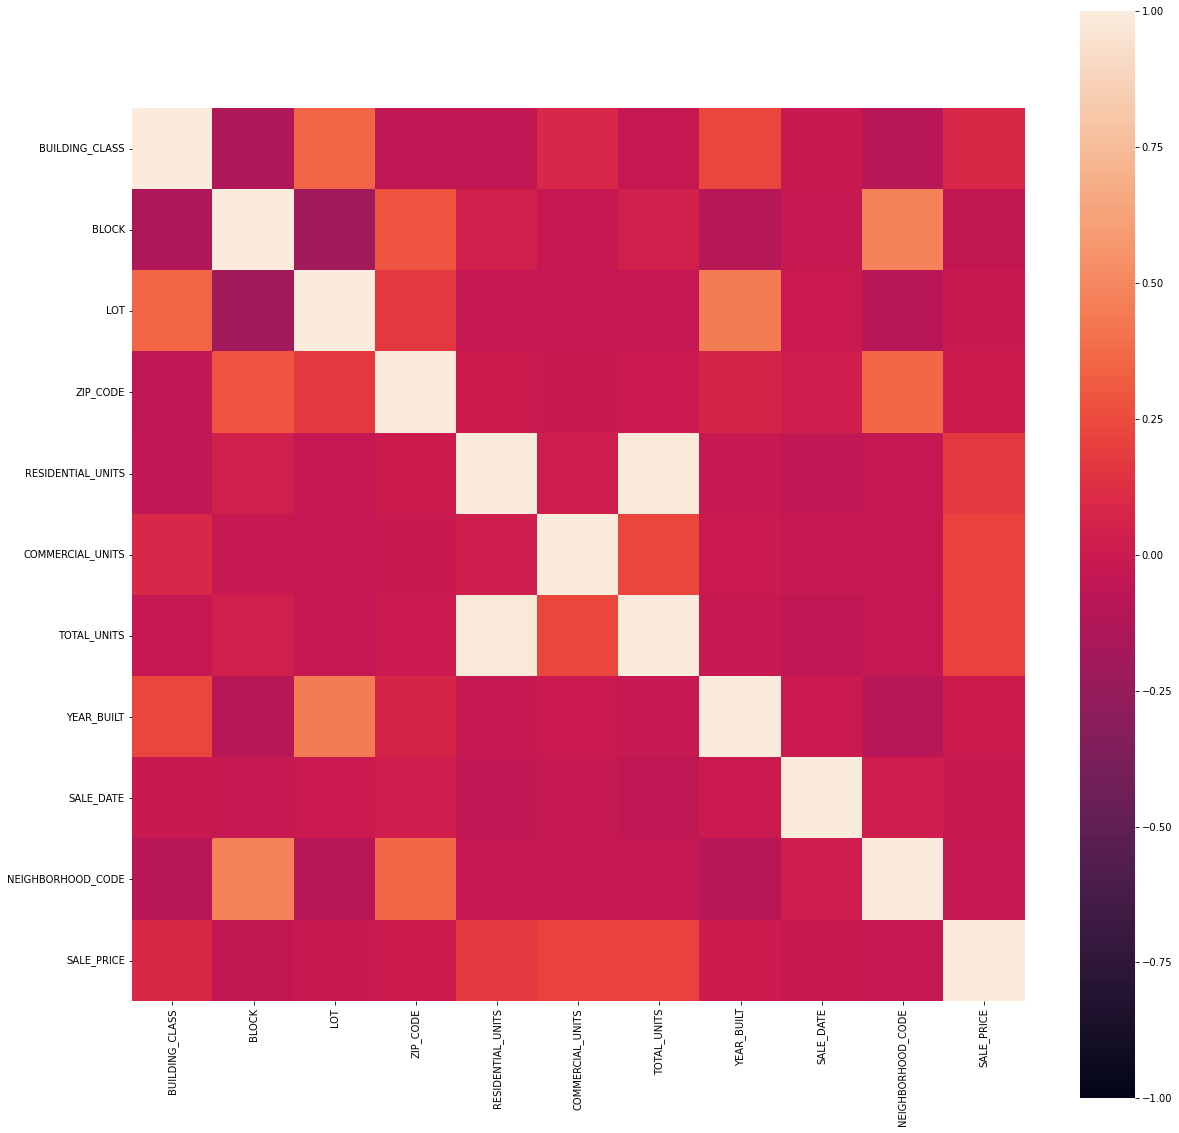

In [23]:
C_mat = data.corr()
fig = plt.figure(figsize=(20,20))

sb.heatmap(C_mat,vmax=1,vmin=-1,square=True)
plt.show()

In [24]:
data = pd.get_dummies(data, columns = ['BUILDING_CLASS','ZIP_CODE','BLOCK', 'LOT','NEIGHBORHOOD_CODE'])

In [25]:
train,test = train_test_split(data, train_size=0.8,test_size=0.2, random_state=10)

In [26]:
train_y = train['SALE_PRICE']
train_x = train.drop(['SALE_PRICE'],axis=1)

In [27]:
initializer = keras.initializers.random_normal()

In [10]:
model1 = keras.Sequential([
    keras.layers.Dense(1000, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(500, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(250, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(50, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(1, activation= "linear")
])
model1.compile(loss='mean_absolute_error',
    optimizer='adam',
    metrics=['mean_absolute_error'])


2021-12-10 13:27:40.914276: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
history1 = model1.fit(train_x, train_y, epochs=500, verbose = 1)

f = open('Model_1_r1.pkl', 'wb')
pkl.dump(history1.history['loss'], f)





Epoch 1/500
313/313 [==============================] - 11s 27ms/step - loss: 2830095.2500 - mean_absolute_error: 2830095.2500
Epoch 2/500
313/313 [==============================] - 9s 28ms/step - loss: 2826310.5000 - mean_absolute_error: 2826310.5000
Epoch 3/500
313/313 [==============================] - 9s 28ms/step - loss: 2821097.7500 - mean_absolute_error: 2821097.7500
Epoch 4/500
313/313 [==============================] - 9s 29ms/step - loss: 2819531.2500 - mean_absolute_error: 2819531.2500
Epoch 5/500
313/313 [==============================] - 9s 28ms/step - loss: 2815213.7500 - mean_absolute_error: 2815213.7500
Epoch 6/500
313/313 [==============================] - 9s 29ms/step - loss: 2817184.7500 - mean_absolute_error: 2817184.7500
Epoch 7/500
313/313 [==============================] - 9s 29ms/step - loss: 2818049.7500 - mean_absolute_error: 2818049.7500
Epoch 8/500
313/313 [==============================] - 9s 29ms/step - loss: 2815344.5000 - mean_absolute_error: 2815344.5000

313/313 [==============================] - 12s 38ms/step - loss: 2813872.5000 - mean_absolute_error: 2813872.5000
Epoch 66/500
313/313 [==============================] - 12s 37ms/step - loss: 2813752.2500 - mean_absolute_error: 2813752.2500
Epoch 67/500
313/313 [==============================] - 12s 37ms/step - loss: 2814185.5000 - mean_absolute_error: 2814185.5000
Epoch 68/500
313/313 [==============================] - 20s 65ms/step - loss: 2813508.7500 - mean_absolute_error: 2813508.7500
Epoch 69/500
313/313 [==============================] - 22s 71ms/step - loss: 2813506.2500 - mean_absolute_error: 2813506.2500
Epoch 70/500
313/313 [==============================] - 25s 79ms/step - loss: 2813614.5000 - mean_absolute_error: 2813614.5000
Epoch 71/500
313/313 [==============================] - 24s 76ms/step - loss: 2812692.5000 - mean_absolute_error: 2812692.5000
Epoch 72/500
313/313 [==============================] - 21s 67ms/step - loss: 2813166.2500 - mean_absolute_error: 2813166.25

313/313 [==============================] - 20s 63ms/step - loss: 2813157.0000 - mean_absolute_error: 2813157.0000
Epoch 129/500
313/313 [==============================] - 20s 64ms/step - loss: 2814097.2500 - mean_absolute_error: 2814097.2500 2s - loss: 2920951.500
Epoch 130/500
313/313 [==============================] - 19s 61ms/step - loss: 2812829.0000 - mean_absolute_error: 2812829.0000
Epoch 131/500
313/313 [==============================] - 19s 59ms/step - loss: 2814074.0000 - mean_absolute_error: 2814074.0000
Epoch 132/500
313/313 [==============================] - 11s 36ms/step - loss: 2813558.5000 - mean_absolute_error: 2813558.5000
Epoch 133/500
313/313 [==============================] - 11s 34ms/step - loss: 2813712.7500 - mean_absolute_error: 2813712.7500
Epoch 134/500
313/313 [==============================] - 10s 33ms/step - loss: 2812726.7500 - mean_absolute_error: 2812726.7500
Epoch 135/500
313/313 [==============================] - 11s 36ms/step - loss: 2812379.2500 - m

313/313 [==============================] - 23s 75ms/step - loss: 2813152.0000 - mean_absolute_error: 2813152.0000 4s - los
Epoch 192/500
313/313 [==============================] - 19s 61ms/step - loss: 2813163.0000 - mean_absolute_error: 2813163.0000
Epoch 193/500
313/313 [==============================] - 12s 38ms/step - loss: 2813229.5000 - mean_absolute_error: 2813229.5000 1s - loss: 2719990.0000 -
Epoch 194/500
313/313 [==============================] - 20s 63ms/step - loss: 2813332.5000 - mean_absolute_error: 2813332.5000
Epoch 195/500
313/313 [==============================] - 21s 67ms/step - loss: 2812736.0000 - mean_absolute_error: 2812736.0000
Epoch 196/500
313/313 [==============================] - 19s 61ms/step - loss: 2813040.7500 - mean_absolute_error: 2813040.7500
Epoch 197/500
313/313 [==============================] - 20s 63ms/step - loss: 2813214.2500 - mean_absolute_error: 2813214.2500
Epoch 198/500
313/313 [==============================] - 20s 64ms/step - loss: 2813

313/313 [==============================] - 22s 70ms/step - loss: 2813007.0000 - mean_absolute_error: 2813007.0000
Epoch 255/500
313/313 [==============================] - 20s 64ms/step - loss: 2812663.0000 - mean_absolute_error: 2812663.0000
Epoch 256/500
313/313 [==============================] - 20s 63ms/step - loss: 2812778.7500 - mean_absolute_error: 2812778.7500
Epoch 257/500
313/313 [==============================] - 24s 76ms/step - loss: 2813014.5000 - mean_absolute_error: 2813014.5000
Epoch 258/500
313/313 [==============================] - 20s 64ms/step - loss: 2813231.7500 - mean_absolute_error: 2813231.7500
Epoch 259/500
313/313 [==============================] - 22s 69ms/step - loss: 2813857.2500 - mean_absolute_error: 2813857.2500
Epoch 260/500
313/313 [==============================] - 17s 54ms/step - loss: 2812949.5000 - mean_absolute_error: 2812949.5000
Epoch 261/500
313/313 [==============================] - 12s 38ms/step - loss: 2813294.2500 - mean_absolute_error: 281

313/313 [==============================] - 10s 31ms/step - loss: 2812826.0000 - mean_absolute_error: 2812826.0000
Epoch 318/500
313/313 [==============================] - 17s 54ms/step - loss: 2813268.2500 - mean_absolute_error: 2813268.2500 1s - loss: 2825792.5000 - mean_absolut
Epoch 319/500
313/313 [==============================] - 21s 68ms/step - loss: 2813231.2500 - mean_absolute_error: 2813231.2500
Epoch 320/500
313/313 [==============================] - 20s 64ms/step - loss: 2813632.7500 - mean_absolute_error: 2813632.7500
Epoch 321/500
313/313 [==============================] - 23s 72ms/step - loss: 2812751.2500 - mean_absolute_error: 2812751.2500
Epoch 322/500
313/313 [==============================] - 22s 71ms/step - loss: 2812555.5000 - mean_absolute_error: 2812555.5000
Epoch 323/500
313/313 [==============================] - 19s 61ms/step - loss: 2813400.7500 - mean_absolute_error: 2813400.7500
Epoch 324/500
313/313 [==============================] - 16s 52ms/step - loss: 

313/313 [==============================] - 11s 34ms/step - loss: 2813742.7500 - mean_absolute_error: 2813742.7500
Epoch 381/500
313/313 [==============================] - 11s 35ms/step - loss: 2813266.2500 - mean_absolute_error: 2813266.2500
Epoch 382/500
313/313 [==============================] - 11s 35ms/step - loss: 2812394.7500 - mean_absolute_error: 2812394.7500
Epoch 383/500
313/313 [==============================] - 10s 33ms/step - loss: 2812711.5000 - mean_absolute_error: 2812711.5000
Epoch 384/500
313/313 [==============================] - 11s 34ms/step - loss: 2812367.0000 - mean_absolute_error: 2812367.0000
Epoch 385/500
313/313 [==============================] - 11s 35ms/step - loss: 2812819.7500 - mean_absolute_error: 2812819.7500
Epoch 386/500
313/313 [==============================] - 11s 36ms/step - loss: 2813050.5000 - mean_absolute_error: 2813050.5000
Epoch 387/500
313/313 [==============================] - 11s 35ms/step - loss: 2812757.5000 - mean_absolute_error: 281

313/313 [==============================] - 11s 35ms/step - loss: 2812478.7500 - mean_absolute_error: 2812478.7500
Epoch 444/500
313/313 [==============================] - 11s 36ms/step - loss: 2812694.2500 - mean_absolute_error: 2812694.2500
Epoch 445/500
313/313 [==============================] - 12s 37ms/step - loss: 2813125.7500 - mean_absolute_error: 2813125.7500
Epoch 446/500
313/313 [==============================] - 12s 39ms/step - loss: 2812474.7500 - mean_absolute_error: 2812474.7500
Epoch 447/500
313/313 [==============================] - 13s 41ms/step - loss: 2812934.7500 - mean_absolute_error: 2812934.7500
Epoch 448/500
313/313 [==============================] - 12s 40ms/step - loss: 2812736.5000 - mean_absolute_error: 2812736.5000
Epoch 449/500
313/313 [==============================] - 12s 39ms/step - loss: 2813490.2500 - mean_absolute_error: 2813490.2500
Epoch 450/500
313/313 [==============================] - 11s 36ms/step - loss: 2813657.0000 - mean_absolute_error: 281

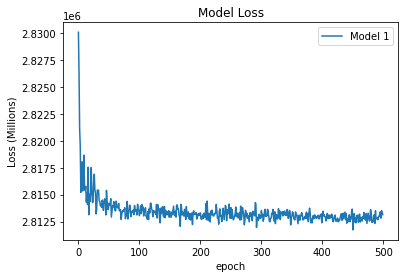

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              2556000   
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 50)                12550     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,194,351
Trainable params: 3,194,351
Non-trainable params: 0
_________________________________________________________________


<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(history1.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss (Millions)')
plt.xlabel('epoch')
plt.legend(['Model 1'])
plt.show()
plt.savefig("Model_1_r1_val_loss")

model1.summary()

In [13]:
model2 = keras.Sequential([
    keras.layers.Dense(1000, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(500, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(500, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(250, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(250, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(50, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(1, activation= "linear")
])
model2.compile(loss='mean_absolute_error',
    optimizer='adam',
    metrics=['mean_absolute_error'])
# model2.summary()


In [14]:
history2 = model2.fit(train_x, train_y, epochs=500, verbose = 1)

f = open('Model_2_r1.pkl', 'wb')
pkl.dump(history2.history['loss'], f)


Epoch 1/500
313/313 [==============================] - 11s 33ms/step - loss: 2836352.5000 - mean_absolute_error: 2836352.5000
Epoch 2/500
313/313 [==============================] - 10s 32ms/step - loss: 2819722.7500 - mean_absolute_error: 2819722.7500
Epoch 3/500
313/313 [==============================] - 10s 33ms/step - loss: 2823677.2500 - mean_absolute_error: 2823677.2500
Epoch 4/500
313/313 [==============================] - 11s 34ms/step - loss: 2820728.0000 - mean_absolute_error: 2820728.0000
Epoch 5/500
313/313 [==============================] - 11s 35ms/step - loss: 2821550.0000 - mean_absolute_error: 2821550.0000
Epoch 6/500
313/313 [==============================] - 10s 33ms/step - loss: 2824113.5000 - mean_absolute_error: 2824113.5000
Epoch 7/500
313/313 [==============================] - 11s 34ms/step - loss: 2822110.5000 - mean_absolute_error: 2822110.5000
Epoch 8/500
313/313 [==============================] - 11s 34ms/step - loss: 2821808.7500 - mean_absolute_error: 28218

313/313 [==============================] - 10s 33ms/step - loss: 2815211.7500 - mean_absolute_error: 2815211.7500
Epoch 66/500
313/313 [==============================] - 10s 31ms/step - loss: 2815050.7500 - mean_absolute_error: 2815050.7500
Epoch 67/500
313/313 [==============================] - 8s 26ms/step - loss: 2814791.2500 - mean_absolute_error: 2814791.2500
Epoch 68/500
313/313 [==============================] - 9s 28ms/step - loss: 2814612.2500 - mean_absolute_error: 2814612.2500
Epoch 69/500
313/313 [==============================] - 9s 30ms/step - loss: 2817003.5000 - mean_absolute_error: 2817003.5000
Epoch 70/500
313/313 [==============================] - 8s 27ms/step - loss: 2815193.0000 - mean_absolute_error: 2815193.0000
Epoch 71/500
313/313 [==============================] - 9s 28ms/step - loss: 2813670.0000 - mean_absolute_error: 2813670.0000
Epoch 72/500
313/313 [==============================] - 9s 28ms/step - loss: 2814626.2500 - mean_absolute_error: 2814626.2500
Epo

313/313 [==============================] - 11s 34ms/step - loss: 2813415.5000 - mean_absolute_error: 2813415.5000
Epoch 130/500
313/313 [==============================] - 11s 35ms/step - loss: 2813427.7500 - mean_absolute_error: 2813427.7500
Epoch 131/500
313/313 [==============================] - 11s 35ms/step - loss: 2814347.5000 - mean_absolute_error: 2814347.5000
Epoch 132/500
313/313 [==============================] - 11s 34ms/step - loss: 2813802.0000 - mean_absolute_error: 2813802.0000
Epoch 133/500
313/313 [==============================] - 9s 30ms/step - loss: 2813565.5000 - mean_absolute_error: 2813565.5000
Epoch 134/500
313/313 [==============================] - 10s 31ms/step - loss: 2814075.7500 - mean_absolute_error: 2814075.7500
Epoch 135/500
313/313 [==============================] - 10s 33ms/step - loss: 2813928.5000 - mean_absolute_error: 2813928.5000
Epoch 136/500
313/313 [==============================] - 11s 34ms/step - loss: 2813164.5000 - mean_absolute_error: 2813

313/313 [==============================] - 10s 33ms/step - loss: 2815604.0000 - mean_absolute_error: 2815604.0000
Epoch 207/500
313/313 [==============================] - 10s 31ms/step - loss: 2812650.5000 - mean_absolute_error: 2812650.5000
Epoch 208/500
313/313 [==============================] - 10s 31ms/step - loss: 2813523.5000 - mean_absolute_error: 2813523.5000
Epoch 209/500
313/313 [==============================] - 10s 31ms/step - loss: 2813588.0000 - mean_absolute_error: 2813588.0000
Epoch 210/500
313/313 [==============================] - 26s 84ms/step - loss: 2813445.2500 - mean_absolute_error: 2813445.2500
Epoch 211/500
313/313 [==============================] - 9s 28ms/step - loss: 2813502.7500 - mean_absolute_error: 2813502.7500
Epoch 212/500
313/313 [==============================] - 11s 36ms/step - loss: 2813471.0000 - mean_absolute_error: 2813471.0000
Epoch 213/500
313/313 [==============================] - 9s 29ms/step - loss: 2814703.2500 - mean_absolute_error: 28147

313/313 [==============================] - 9s 30ms/step - loss: 2814646.7500 - mean_absolute_error: 2814646.7500
Epoch 270/500
313/313 [==============================] - 9s 30ms/step - loss: 2813074.2500 - mean_absolute_error: 2813074.2500
Epoch 271/500
313/313 [==============================] - 9s 29ms/step - loss: 2813233.7500 - mean_absolute_error: 2813233.7500
Epoch 272/500
313/313 [==============================] - 10s 31ms/step - loss: 2813689.2500 - mean_absolute_error: 2813689.2500
Epoch 273/500
313/313 [==============================] - 9s 29ms/step - loss: 2812850.5000 - mean_absolute_error: 2812850.5000
Epoch 274/500
313/313 [==============================] - 9s 30ms/step - loss: 2813215.7500 - mean_absolute_error: 2813215.7500
Epoch 275/500
313/313 [==============================] - 9s 30ms/step - loss: 2812912.2500 - mean_absolute_error: 2812912.2500
Epoch 276/500
313/313 [==============================] - 9s 30ms/step - loss: 2813959.7500 - mean_absolute_error: 2813959.75

313/313 [==============================] - 11s 34ms/step - loss: 2813577.2500 - mean_absolute_error: 2813577.2500
Epoch 333/500
313/313 [==============================] - 10s 33ms/step - loss: 2812899.2500 - mean_absolute_error: 2812899.2500
Epoch 334/500
313/313 [==============================] - 11s 34ms/step - loss: 2813422.2500 - mean_absolute_error: 2813422.2500
Epoch 335/500
313/313 [==============================] - 10s 30ms/step - loss: 2813040.0000 - mean_absolute_error: 2813040.0000
Epoch 336/500
313/313 [==============================] - 9s 29ms/step - loss: 2813843.2500 - mean_absolute_error: 2813843.2500
Epoch 337/500
313/313 [==============================] - 9s 30ms/step - loss: 2813179.0000 - mean_absolute_error: 2813179.0000
Epoch 338/500
313/313 [==============================] - 10s 32ms/step - loss: 2812292.2500 - mean_absolute_error: 2812292.2500
Epoch 339/500
313/313 [==============================] - 10s 32ms/step - loss: 2813017.7500 - mean_absolute_error: 28130

313/313 [==============================] - 10s 33ms/step - loss: 2813816.7500 - mean_absolute_error: 2813816.7500
Epoch 396/500
313/313 [==============================] - 10s 33ms/step - loss: 2812960.0000 - mean_absolute_error: 2812960.0000
Epoch 397/500
313/313 [==============================] - 10s 33ms/step - loss: 2813816.2500 - mean_absolute_error: 2813816.2500 1s - loss: 2758385.0000 - mean_absolute_er
Epoch 398/500
313/313 [==============================] - 10s 33ms/step - loss: 2813642.7500 - mean_absolute_error: 2813642.7500
Epoch 399/500
313/313 [==============================] - 11s 36ms/step - loss: 2813071.0000 - mean_absolute_error: 2813071.0000
Epoch 400/500
313/313 [==============================] - 12s 38ms/step - loss: 2812877.7500 - mean_absolute_error: 2812877.7500
Epoch 401/500
313/313 [==============================] - 12s 37ms/step - loss: 2812513.7500 - mean_absolute_error: 2812513.7500
Epoch 402/500
313/313 [==============================] - 11s 34ms/step - lo

313/313 [==============================] - 11s 34ms/step - loss: 2814086.0000 - mean_absolute_error: 2814086.0000
Epoch 459/500
313/313 [==============================] - 10s 32ms/step - loss: 2813367.5000 - mean_absolute_error: 2813367.5000
Epoch 460/500
313/313 [==============================] - 10s 32ms/step - loss: 2813558.2500 - mean_absolute_error: 2813558.2500
Epoch 461/500
313/313 [==============================] - 10s 34ms/step - loss: 2812910.5000 - mean_absolute_error: 2812910.5000
Epoch 462/500
313/313 [==============================] - 11s 34ms/step - loss: 2812906.5000 - mean_absolute_error: 2812906.5000
Epoch 463/500
313/313 [==============================] - 11s 36ms/step - loss: 2812954.0000 - mean_absolute_error: 2812954.0000
Epoch 464/500
313/313 [==============================] - 11s 34ms/step - loss: 2813178.2500 - mean_absolute_error: 2813178.2500
Epoch 465/500
313/313 [==============================] - 11s 35ms/step - loss: 2812752.5000 - mean_absolute_error: 281

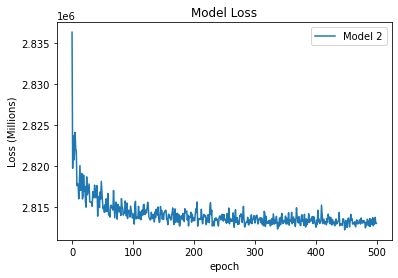

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              2556000   
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 50)                12550     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,194,351
Trainable params: 3,194,351
Non-trainable params: 0
_________________________________________________________________


<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss (Millions)')
plt.xlabel('epoch')
plt.legend(['Model 2'])
plt.show()
plt.savefig("Model_2_r1_val_loss")

model1.summary()

In [16]:
model3 = keras.Sequential([
    keras.layers.Dense(1000, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(500, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(500, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(250, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(50, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(1, activation= "linear")
])
model3.compile(loss='mean_absolute_error',
    optimizer='adam',
    metrics=['mean_absolute_error'])
# model3.summary()


In [17]:
history3 = model3.fit(train_x, train_y, epochs=500, verbose = 1)

f = open('Model_3_r1.pkl', 'wb')
pkl.dump(history3.history['loss'], f)


Epoch 1/500
313/313 [==============================] - 11s 29ms/step - loss: 2833904.2500 - mean_absolute_error: 2833904.2500
Epoch 2/500
313/313 [==============================] - 9s 30ms/step - loss: 2822664.2500 - mean_absolute_error: 2822664.2500
Epoch 3/500
313/313 [==============================] - 9s 30ms/step - loss: 2823150.5000 - mean_absolute_error: 2823150.5000
Epoch 4/500
313/313 [==============================] - 10s 31ms/step - loss: 2819536.5000 - mean_absolute_error: 2819536.5000
Epoch 5/500
313/313 [==============================] - 9s 30ms/step - loss: 2825063.7500 - mean_absolute_error: 2825063.7500
Epoch 6/500
313/313 [==============================] - 10s 31ms/step - loss: 2818367.2500 - mean_absolute_error: 2818367.2500
Epoch 7/500
313/313 [==============================] - 10s 31ms/step - loss: 2816177.0000 - mean_absolute_error: 2816177.0000
Epoch 8/500
313/313 [==============================] - 10s 33ms/step - loss: 2819418.5000 - mean_absolute_error: 2819418.

313/313 [==============================] - 11s 35ms/step - loss: 2814703.7500 - mean_absolute_error: 2814703.7500
Epoch 66/500
313/313 [==============================] - 11s 34ms/step - loss: 2814532.5000 - mean_absolute_error: 2814532.5000
Epoch 67/500
313/313 [==============================] - 11s 34ms/step - loss: 2813799.0000 - mean_absolute_error: 2813799.0000
Epoch 68/500
313/313 [==============================] - 11s 35ms/step - loss: 2813753.7500 - mean_absolute_error: 2813753.7500
Epoch 69/500
313/313 [==============================] - 11s 35ms/step - loss: 2814712.0000 - mean_absolute_error: 2814712.0000
Epoch 70/500
313/313 [==============================] - 13s 41ms/step - loss: 2814670.5000 - mean_absolute_error: 2814670.5000
Epoch 71/500
313/313 [==============================] - 12s 38ms/step - loss: 2814019.0000 - mean_absolute_error: 2814019.0000
Epoch 72/500
313/313 [==============================] - 12s 39ms/step - loss: 2815154.7500 - mean_absolute_error: 2815154.75

313/313 [==============================] - 11s 34ms/step - loss: 2814278.0000 - mean_absolute_error: 2814278.0000 3s - 
Epoch 129/500
313/313 [==============================] - 11s 36ms/step - loss: 2813534.0000 - mean_absolute_error: 2813534.0000
Epoch 130/500
313/313 [==============================] - 11s 36ms/step - loss: 2814285.0000 - mean_absolute_error: 2814285.0000
Epoch 131/500
313/313 [==============================] - 11s 36ms/step - loss: 2813005.0000 - mean_absolute_error: 2813005.0000
Epoch 132/500
313/313 [==============================] - 12s 40ms/step - loss: 2814695.0000 - mean_absolute_error: 2814695.0000
Epoch 133/500
313/313 [==============================] - 11s 35ms/step - loss: 2813626.5000 - mean_absolute_error: 2813626.5000
Epoch 134/500
313/313 [==============================] - 12s 39ms/step - loss: 2812955.5000 - mean_absolute_error: 2812955.5000
Epoch 135/500
313/313 [==============================] - 12s 39ms/step - loss: 2813675.5000 - mean_absolute_erro

313/313 [==============================] - 12s 38ms/step - loss: 2814099.7500 - mean_absolute_error: 2814099.7500
Epoch 193/500
313/313 [==============================] - 12s 38ms/step - loss: 2814319.0000 - mean_absolute_error: 2814319.0000
Epoch 194/500
313/313 [==============================] - 11s 34ms/step - loss: 2813897.0000 - mean_absolute_error: 2813897.0000
Epoch 195/500
313/313 [==============================] - 11s 36ms/step - loss: 2812684.0000 - mean_absolute_error: 2812684.0000
Epoch 196/500
313/313 [==============================] - 12s 39ms/step - loss: 2813899.2500 - mean_absolute_error: 2813899.2500
Epoch 197/500
313/313 [==============================] - 11s 34ms/step - loss: 2813066.0000 - mean_absolute_error: 2813066.0000
Epoch 198/500
313/313 [==============================] - 10s 33ms/step - loss: 2813753.5000 - mean_absolute_error: 2813753.5000
Epoch 199/500
313/313 [==============================] - 10s 33ms/step - loss: 2813997.5000 - mean_absolute_error: 281

313/313 [==============================] - 10s 31ms/step - loss: 2813544.0000 - mean_absolute_error: 2813544.0000 1s - loss: 2875052.2500 - mean_absolute_e
Epoch 256/500
313/313 [==============================] - 11s 36ms/step - loss: 2813456.7500 - mean_absolute_error: 2813456.7500
Epoch 257/500
313/313 [==============================] - 10s 31ms/step - loss: 2813797.5000 - mean_absolute_error: 2813797.5000
Epoch 258/500
313/313 [==============================] - 10s 31ms/step - loss: 2813682.0000 - mean_absolute_error: 2813682.0000
Epoch 259/500
313/313 [==============================] - 9s 30ms/step - loss: 2813393.0000 - mean_absolute_error: 2813393.0000
Epoch 260/500
313/313 [==============================] - 9s 30ms/step - loss: 2813440.5000 - mean_absolute_error: 2813440.5000
Epoch 261/500
313/313 [==============================] - 9s 30ms/step - loss: 2813518.5000 - mean_absolute_error: 2813518.5000
Epoch 262/500
313/313 [==============================] - 9s 30ms/step - loss: 2

KeyboardInterrupt: 

In [ ]:
plt.plot(history3.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss (Millions)')
plt.xlabel('epoch')
plt.legend(['Model 3'])
plt.show()
plt.savefig("Model_3_r1_val_loss")

model1.summary()

In [28]:
train_y = train['SALE_PRICE']
train_x = train.drop(['SALE_PRICE'],axis=1)
x = train_x.to_numpy()
y = train_y.to_numpy()
initializer = keras.initializers.random_normal()

KFold(n_splits=5, random_state=None, shuffle=True)
Epoch 1/100
251/251 [==============================] - 7s 25ms/step - loss: 2790428.0000 - mean_absolute_error: 2790428.0000
Epoch 2/100
251/251 [==============================] - 6s 23ms/step - loss: 2784209.5000 - mean_absolute_error: 2784209.5000
Epoch 3/100
251/251 [==============================] - 5s 22ms/step - loss: 2778164.7500 - mean_absolute_error: 2778164.7500
Epoch 4/100
251/251 [==============================] - 5s 21ms/step - loss: 2777329.2500 - mean_absolute_error: 2777329.2500
Epoch 5/100
251/251 [==============================] - 6s 23ms/step - loss: 2775869.2500 - mean_absolute_error: 2775869.2500
Epoch 6/100
251/251 [==============================] - 6s 23ms/step - loss: 2776316.2500 - mean_absolute_error: 2776316.2500
Epoch 7/100
251/251 [==============================] - 6s 24ms/step - loss: 2779041.7500 - mean_absolute_error: 2779041.7500
Epoch 8/100
251/251 [==============================] - 6s 22ms/step - loss

251/251 [==============================] - 6s 24ms/step - loss: 2772247.0000 - mean_absolute_error: 2772247.0000
Epoch 66/100
251/251 [==============================] - 6s 24ms/step - loss: 2772116.5000 - mean_absolute_error: 2772116.5000
Epoch 67/100
251/251 [==============================] - 6s 23ms/step - loss: 2770648.0000 - mean_absolute_error: 2770648.0000
Epoch 68/100
251/251 [==============================] - 6s 23ms/step - loss: 2770839.7500 - mean_absolute_error: 2770839.7500
Epoch 69/100
251/251 [==============================] - 5s 21ms/step - loss: 2771328.0000 - mean_absolute_error: 2771328.0000
Epoch 70/100
251/251 [==============================] - 6s 23ms/step - loss: 2771141.2500 - mean_absolute_error: 2771141.2500
Epoch 71/100
251/251 [==============================] - 5s 21ms/step - loss: 2771899.2500 - mean_absolute_error: 2771899.2500
Epoch 72/100
251/251 [==============================] - 5s 20ms/step - loss: 2770330.7500 - mean_absolute_error: 2770330.7500
Epoch

251/251 [==============================] - 6s 25ms/step - loss: 2773638.5000 - mean_absolute_error: 2773638.5000
Epoch 30/100
251/251 [==============================] - 7s 27ms/step - loss: 2775277.5000 - mean_absolute_error: 2775277.5000
Epoch 31/100
251/251 [==============================] - 7s 26ms/step - loss: 2773723.0000 - mean_absolute_error: 2773723.0000
Epoch 32/100
251/251 [==============================] - 7s 26ms/step - loss: 2772964.7500 - mean_absolute_error: 2772964.7500
Epoch 33/100
251/251 [==============================] - 6s 25ms/step - loss: 2774181.5000 - mean_absolute_error: 2774181.5000
Epoch 34/100
251/251 [==============================] - 7s 26ms/step - loss: 2777062.2500 - mean_absolute_error: 2777062.2500
Epoch 35/100
251/251 [==============================] - 7s 27ms/step - loss: 2772536.0000 - mean_absolute_error: 2772536.0000
Epoch 36/100
251/251 [==============================] - 6s 25ms/step - loss: 2775001.5000 - mean_absolute_error: 2775001.5000
Epoch

251/251 [==============================] - 5s 20ms/step - loss: 2771273.0000 - mean_absolute_error: 2771273.0000
Epoch 95/100
251/251 [==============================] - 5s 21ms/step - loss: 2772192.0000 - mean_absolute_error: 2772192.0000
Epoch 96/100
251/251 [==============================] - 5s 22ms/step - loss: 2770085.7500 - mean_absolute_error: 2770085.7500
Epoch 97/100
251/251 [==============================] - 5s 21ms/step - loss: 2773485.2500 - mean_absolute_error: 2773485.2500
Epoch 98/100
251/251 [==============================] - 5s 20ms/step - loss: 2773396.7500 - mean_absolute_error: 2773396.7500
Epoch 99/100
251/251 [==============================] - 5s 18ms/step - loss: 2769401.7500 - mean_absolute_error: 2769401.7500
Epoch 100/100
251/251 [==============================] - 5s 18ms/step - loss: 2771571.7500 - mean_absolute_error: 2771571.7500
Epoch 1/100
251/251 [==============================] - 5s 18ms/step - loss: 2795449.0000 - mean_absolute_error: 2795449.0000
Epoch

251/251 [==============================] - 4s 16ms/step - loss: 2772366.7500 - mean_absolute_error: 2772366.7500
Epoch 60/100
251/251 [==============================] - 4s 16ms/step - loss: 2772564.7500 - mean_absolute_error: 2772564.7500
Epoch 61/100
251/251 [==============================] - 4s 16ms/step - loss: 2772276.5000 - mean_absolute_error: 2772276.5000
Epoch 62/100
251/251 [==============================] - 4s 17ms/step - loss: 2772644.7500 - mean_absolute_error: 2772644.7500
Epoch 63/100
251/251 [==============================] - 4s 17ms/step - loss: 2772467.0000 - mean_absolute_error: 2772467.0000
Epoch 64/100
251/251 [==============================] - 4s 18ms/step - loss: 2771752.5000 - mean_absolute_error: 2771752.5000
Epoch 65/100
251/251 [==============================] - 4s 17ms/step - loss: 2772363.0000 - mean_absolute_error: 2772363.0000
Epoch 66/100
251/251 [==============================] - 4s 18ms/step - loss: 2773872.2500 - mean_absolute_error: 2773872.2500
Epoch

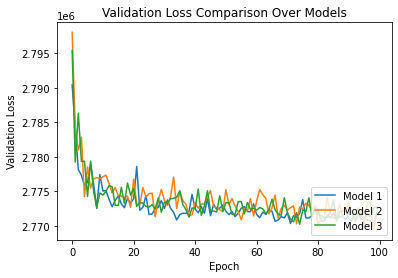

Epoch 1/100
251/251 [==============================] - 4s 14ms/step - loss: 2994000.2500 - mean_absolute_error: 2994000.2500
Epoch 2/100
251/251 [==============================] - 3s 13ms/step - loss: 2979155.2500 - mean_absolute_error: 2979155.2500
Epoch 3/100
251/251 [==============================] - 3s 13ms/step - loss: 2975634.5000 - mean_absolute_error: 2975634.5000
Epoch 4/100
251/251 [==============================] - 3s 13ms/step - loss: 2976065.7500 - mean_absolute_error: 2976065.7500
Epoch 5/100
251/251 [==============================] - 3s 13ms/step - loss: 2974449.5000 - mean_absolute_error: 2974449.5000
Epoch 6/100
251/251 [==============================] - 3s 14ms/step - loss: 2977039.7500 - mean_absolute_error: 2977039.7500
Epoch 7/100
251/251 [==============================] - 4s 14ms/step - loss: 2975504.5000 - mean_absolute_error: 2975504.5000
Epoch 8/100
251/251 [==============================] - 3s 14ms/step - loss: 2971377.2500 - mean_absolute_error: 2971377.2500


251/251 [==============================] - 4s 15ms/step - loss: 2971997.0000 - mean_absolute_error: 2971997.0000
Epoch 67/100
251/251 [==============================] - 4s 15ms/step - loss: 2970348.7500 - mean_absolute_error: 2970348.7500
Epoch 68/100
251/251 [==============================] - 4s 15ms/step - loss: 2972060.7500 - mean_absolute_error: 2972060.7500
Epoch 69/100
251/251 [==============================] - 4s 15ms/step - loss: 2972855.2500 - mean_absolute_error: 2972855.2500
Epoch 70/100
251/251 [==============================] - 4s 15ms/step - loss: 2969640.5000 - mean_absolute_error: 2969640.5000
Epoch 71/100
251/251 [==============================] - 4s 16ms/step - loss: 2971357.2500 - mean_absolute_error: 2971357.2500
Epoch 72/100
251/251 [==============================] - 3s 13ms/step - loss: 2971175.7500 - mean_absolute_error: 2971175.7500
Epoch 73/100
251/251 [==============================] - 4s 15ms/step - loss: 2970816.5000 - mean_absolute_error: 2970816.5000
Epoch

251/251 [==============================] - 5s 19ms/step - loss: 2972872.5000 - mean_absolute_error: 2972872.5000
Epoch 32/100
251/251 [==============================] - 4s 15ms/step - loss: 2972893.0000 - mean_absolute_error: 2972893.0000
Epoch 33/100
251/251 [==============================] - 3s 14ms/step - loss: 2974814.2500 - mean_absolute_error: 2974814.2500
Epoch 34/100
251/251 [==============================] - 3s 14ms/step - loss: 2973645.2500 - mean_absolute_error: 2973645.2500
Epoch 35/100
251/251 [==============================] - 4s 14ms/step - loss: 2974087.0000 - mean_absolute_error: 2974087.0000
Epoch 36/100
251/251 [==============================] - 4s 14ms/step - loss: 2972637.5000 - mean_absolute_error: 2972637.5000
Epoch 37/100
251/251 [==============================] - 3s 14ms/step - loss: 2973182.2500 - mean_absolute_error: 2973182.2500
Epoch 38/100
251/251 [==============================] - 4s 14ms/step - loss: 2972914.5000 - mean_absolute_error: 2972914.5000
Epoch

251/251 [==============================] - 4s 15ms/step - loss: 2970277.5000 - mean_absolute_error: 2970277.5000
Epoch 97/100
251/251 [==============================] - 4s 15ms/step - loss: 2974132.0000 - mean_absolute_error: 2974132.0000
Epoch 98/100
251/251 [==============================] - 4s 14ms/step - loss: 2970368.5000 - mean_absolute_error: 2970368.5000
Epoch 99/100
251/251 [==============================] - 4s 15ms/step - loss: 2971927.0000 - mean_absolute_error: 2971927.0000
Epoch 100/100
251/251 [==============================] - 4s 15ms/step - loss: 2970613.7500 - mean_absolute_error: 2970613.7500
Epoch 1/100
251/251 [==============================] - 4s 14ms/step - loss: 2994715.2500 - mean_absolute_error: 2994715.2500
Epoch 2/100
251/251 [==============================] - 3s 14ms/step - loss: 2977267.7500 - mean_absolute_error: 2977267.7500
Epoch 3/100
251/251 [==============================] - 3s 14ms/step - loss: 2980378.5000 - mean_absolute_error: 2980378.5000
Epoch 4

251/251 [==============================] - 4s 15ms/step - loss: 2972060.0000 - mean_absolute_error: 2972060.0000
Epoch 62/100
251/251 [==============================] - 4s 15ms/step - loss: 2970854.2500 - mean_absolute_error: 2970854.2500
Epoch 63/100
251/251 [==============================] - 4s 16ms/step - loss: 2971263.5000 - mean_absolute_error: 2971263.5000: 2s - loss: 3370368.750
Epoch 64/100
251/251 [==============================] - 4s 16ms/step - loss: 2972256.0000 - mean_absolute_error: 2972256.0000
Epoch 65/100
251/251 [==============================] - 4s 17ms/step - loss: 2971539.0000 - mean_absolute_error: 2971539.0000
Epoch 66/100
251/251 [==============================] - 4s 17ms/step - loss: 2970808.7500 - mean_absolute_error: 2970808.7500
Epoch 67/100
251/251 [==============================] - 4s 17ms/step - loss: 2970506.2500 - mean_absolute_error: 2970506.2500
Epoch 68/100
251/251 [==============================] - 4s 16ms/step - loss: 2971681.0000 - mean_absolute_e

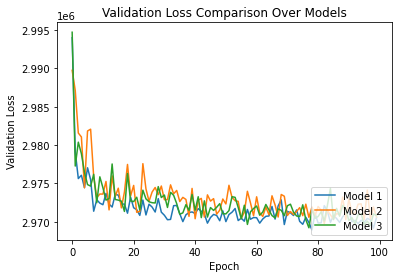

Epoch 1/100
251/251 [==============================] - 4s 15ms/step - loss: 2966371.0000 - mean_absolute_error: 2966371.0000
Epoch 2/100
251/251 [==============================] - 4s 14ms/step - loss: 2946187.0000 - mean_absolute_error: 2946187.0000
Epoch 3/100
251/251 [==============================] - 4s 15ms/step - loss: 2948068.2500 - mean_absolute_error: 2948068.2500
Epoch 4/100
251/251 [==============================] - 4s 14ms/step - loss: 2946010.5000 - mean_absolute_error: 2946010.5000
Epoch 5/100
251/251 [==============================] - 4s 14ms/step - loss: 2942124.0000 - mean_absolute_error: 2942124.0000
Epoch 6/100
251/251 [==============================] - 4s 14ms/step - loss: 2941476.5000 - mean_absolute_error: 2941476.5000
Epoch 7/100
251/251 [==============================] - 4s 14ms/step - loss: 2941647.0000 - mean_absolute_error: 2941647.0000
Epoch 8/100
251/251 [==============================] - 4s 15ms/step - loss: 2942922.0000 - mean_absolute_error: 2942922.0000


251/251 [==============================] - 4s 14ms/step - loss: 2940081.5000 - mean_absolute_error: 2940081.5000
Epoch 67/100
251/251 [==============================] - 4s 15ms/step - loss: 2938936.5000 - mean_absolute_error: 2938936.5000
Epoch 68/100
251/251 [==============================] - 4s 15ms/step - loss: 2940425.2500 - mean_absolute_error: 2940425.2500
Epoch 69/100
251/251 [==============================] - 4s 15ms/step - loss: 2939581.2500 - mean_absolute_error: 2939581.2500
Epoch 70/100
251/251 [==============================] - 4s 16ms/step - loss: 2939089.2500 - mean_absolute_error: 2939089.2500
Epoch 71/100
251/251 [==============================] - 4s 17ms/step - loss: 2938242.7500 - mean_absolute_error: 2938242.7500
Epoch 72/100
251/251 [==============================] - 4s 16ms/step - loss: 2937777.2500 - mean_absolute_error: 2937777.2500
Epoch 73/100
251/251 [==============================] - 4s 16ms/step - loss: 2938218.0000 - mean_absolute_error: 2938218.0000
Epoch

251/251 [==============================] - 4s 15ms/step - loss: 2940656.2500 - mean_absolute_error: 2940656.2500
Epoch 32/100
251/251 [==============================] - 4s 15ms/step - loss: 2942525.0000 - mean_absolute_error: 2942525.0000
Epoch 33/100
251/251 [==============================] - 4s 15ms/step - loss: 2941333.2500 - mean_absolute_error: 2941333.2500
Epoch 34/100
251/251 [==============================] - 4s 17ms/step - loss: 2939902.0000 - mean_absolute_error: 2939902.0000
Epoch 35/100
251/251 [==============================] - 4s 16ms/step - loss: 2939118.5000 - mean_absolute_error: 2939118.5000
Epoch 36/100
251/251 [==============================] - 4s 16ms/step - loss: 2941977.2500 - mean_absolute_error: 2941977.2500
Epoch 37/100
251/251 [==============================] - 4s 15ms/step - loss: 2941576.0000 - mean_absolute_error: 2941576.0000
Epoch 38/100
251/251 [==============================] - 4s 16ms/step - loss: 2939579.7500 - mean_absolute_error: 2939579.7500
Epoch

251/251 [==============================] - 4s 15ms/step - loss: 2937725.5000 - mean_absolute_error: 2937725.5000
Epoch 96/100
251/251 [==============================] - 4s 14ms/step - loss: 2939601.5000 - mean_absolute_error: 2939601.5000
Epoch 97/100
251/251 [==============================] - 4s 14ms/step - loss: 2938112.0000 - mean_absolute_error: 2938112.0000
Epoch 98/100
251/251 [==============================] - 4s 14ms/step - loss: 2939278.7500 - mean_absolute_error: 2939278.7500
Epoch 99/100
251/251 [==============================] - 4s 14ms/step - loss: 2938627.0000 - mean_absolute_error: 2938627.0000
Epoch 100/100
251/251 [==============================] - 4s 14ms/step - loss: 2939549.0000 - mean_absolute_error: 2939549.0000
Epoch 1/100
251/251 [==============================] - 4s 14ms/step - loss: 2962127.7500 - mean_absolute_error: 2962127.7500
Epoch 2/100
251/251 [==============================] - 3s 14ms/step - loss: 2951629.5000 - mean_absolute_error: 2951629.5000
Epoch 

251/251 [==============================] - 4s 18ms/step - loss: 2940269.7500 - mean_absolute_error: 2940269.7500
Epoch 61/100
251/251 [==============================] - 4s 15ms/step - loss: 2939405.7500 - mean_absolute_error: 2939405.7500
Epoch 62/100
251/251 [==============================] - 4s 16ms/step - loss: 2939745.0000 - mean_absolute_error: 2939745.0000
Epoch 63/100
251/251 [==============================] - 4s 15ms/step - loss: 2939345.2500 - mean_absolute_error: 2939345.2500
Epoch 64/100
251/251 [==============================] - 4s 14ms/step - loss: 2939795.2500 - mean_absolute_error: 2939795.2500
Epoch 65/100
251/251 [==============================] - 4s 15ms/step - loss: 2938864.0000 - mean_absolute_error: 2938864.0000
Epoch 66/100
251/251 [==============================] - 4s 15ms/step - loss: 2939519.0000 - mean_absolute_error: 2939519.0000
Epoch 67/100
251/251 [==============================] - 4s 14ms/step - loss: 2938662.5000 - mean_absolute_error: 2938662.5000
Epoch

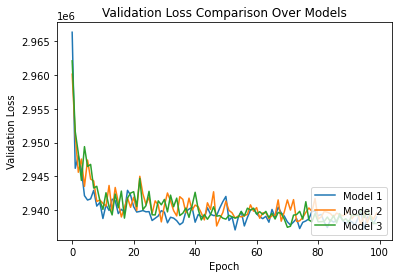

Epoch 1/100
251/251 [==============================] - 3s 12ms/step - loss: 2470502.2500 - mean_absolute_error: 2470502.2500
Epoch 2/100
251/251 [==============================] - 3s 12ms/step - loss: 2455700.7500 - mean_absolute_error: 2455700.7500
Epoch 3/100
251/251 [==============================] - 3s 13ms/step - loss: 2449773.2500 - mean_absolute_error: 2449773.2500
Epoch 4/100
251/251 [==============================] - 3s 14ms/step - loss: 2452173.0000 - mean_absolute_error: 2452173.0000
Epoch 5/100
251/251 [==============================] - 3s 13ms/step - loss: 2455769.2500 - mean_absolute_error: 2455769.2500
Epoch 6/100
251/251 [==============================] - 3s 13ms/step - loss: 2449594.2500 - mean_absolute_error: 2449594.2500
Epoch 7/100
251/251 [==============================] - 3s 13ms/step - loss: 2451323.5000 - mean_absolute_error: 2451323.5000
Epoch 8/100
251/251 [==============================] - 3s 13ms/step - loss: 2448140.2500 - mean_absolute_error: 2448140.2500


251/251 [==============================] - 3s 14ms/step - loss: 2445215.7500 - mean_absolute_error: 2445215.7500
Epoch 67/100
251/251 [==============================] - 4s 14ms/step - loss: 2446337.7500 - mean_absolute_error: 2446337.7500
Epoch 68/100
251/251 [==============================] - 3s 14ms/step - loss: 2445838.5000 - mean_absolute_error: 2445838.5000
Epoch 69/100
251/251 [==============================] - 3s 14ms/step - loss: 2445625.5000 - mean_absolute_error: 2445625.5000
Epoch 70/100
251/251 [==============================] - 4s 14ms/step - loss: 2444523.2500 - mean_absolute_error: 2444523.2500
Epoch 71/100
251/251 [==============================] - 4s 14ms/step - loss: 2445697.5000 - mean_absolute_error: 2445697.5000
Epoch 72/100
251/251 [==============================] - 4s 16ms/step - loss: 2444962.7500 - mean_absolute_error: 2444962.7500
Epoch 73/100
251/251 [==============================] - 4s 15ms/step - loss: 2446884.0000 - mean_absolute_error: 2446884.0000
Epoch

251/251 [==============================] - 4s 18ms/step - loss: 2449994.2500 - mean_absolute_error: 2449994.2500
Epoch 32/100
251/251 [==============================] - 5s 18ms/step - loss: 2448119.7500 - mean_absolute_error: 2448119.7500
Epoch 33/100
251/251 [==============================] - 4s 16ms/step - loss: 2447101.7500 - mean_absolute_error: 2447101.7500
Epoch 34/100
251/251 [==============================] - 4s 14ms/step - loss: 2447377.5000 - mean_absolute_error: 2447377.5000
Epoch 35/100
251/251 [==============================] - 4s 14ms/step - loss: 2447404.5000 - mean_absolute_error: 2447404.5000
Epoch 36/100
251/251 [==============================] - 4s 14ms/step - loss: 2446955.7500 - mean_absolute_error: 2446955.7500
Epoch 37/100
251/251 [==============================] - 3s 14ms/step - loss: 2449801.7500 - mean_absolute_error: 2449801.7500
Epoch 38/100
251/251 [==============================] - 4s 14ms/step - loss: 2445212.7500 - mean_absolute_error: 2445212.7500
Epoch

251/251 [==============================] - 4s 15ms/step - loss: 2444364.7500 - mean_absolute_error: 2444364.7500
Epoch 97/100
251/251 [==============================] - 4s 16ms/step - loss: 2446454.2500 - mean_absolute_error: 2446454.2500
Epoch 98/100
251/251 [==============================] - 4s 16ms/step - loss: 2446376.0000 - mean_absolute_error: 2446376.0000
Epoch 99/100
251/251 [==============================] - 4s 15ms/step - loss: 2445804.2500 - mean_absolute_error: 2445804.2500
Epoch 100/100
251/251 [==============================] - 4s 15ms/step - loss: 2444866.0000 - mean_absolute_error: 2444866.0000
Epoch 1/100
251/251 [==============================] - 5s 16ms/step - loss: 2466866.0000 - mean_absolute_error: 2466866.0000
Epoch 2/100
251/251 [==============================] - 4s 16ms/step - loss: 2453189.7500 - mean_absolute_error: 2453189.7500
Epoch 3/100
251/251 [==============================] - 4s 16ms/step - loss: 2455148.7500 - mean_absolute_error: 2455148.7500
Epoch 4

251/251 [==============================] - 5s 19ms/step - loss: 2446999.5000 - mean_absolute_error: 2446999.5000
Epoch 62/100
251/251 [==============================] - 5s 19ms/step - loss: 2446066.7500 - mean_absolute_error: 2446066.7500
Epoch 63/100
251/251 [==============================] - 5s 21ms/step - loss: 2446161.2500 - mean_absolute_error: 2446161.2500
Epoch 64/100
251/251 [==============================] - 5s 20ms/step - loss: 2444967.2500 - mean_absolute_error: 2444967.2500
Epoch 65/100
251/251 [==============================] - 5s 20ms/step - loss: 2446840.5000 - mean_absolute_error: 2446840.5000
Epoch 66/100
251/251 [==============================] - 5s 22ms/step - loss: 2444595.5000 - mean_absolute_error: 2444595.5000
Epoch 67/100
251/251 [==============================] - 5s 21ms/step - loss: 2444476.0000 - mean_absolute_error: 2444476.0000
Epoch 68/100
251/251 [==============================] - 6s 22ms/step - loss: 2445221.7500 - mean_absolute_error: 2445221.7500
Epoch

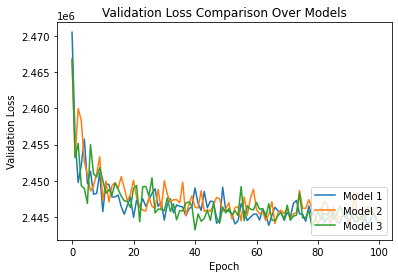

Epoch 1/100
251/251 [==============================] - 4s 15ms/step - loss: 2971396.0000 - mean_absolute_error: 2971396.0000
Epoch 2/100
251/251 [==============================] - 4s 16ms/step - loss: 2951599.5000 - mean_absolute_error: 2951599.5000
Epoch 3/100
251/251 [==============================] - 4s 14ms/step - loss: 2951025.2500 - mean_absolute_error: 2951025.2500
Epoch 4/100
251/251 [==============================] - 4s 14ms/step - loss: 2951335.5000 - mean_absolute_error: 2951335.5000
Epoch 5/100
251/251 [==============================] - 4s 15ms/step - loss: 2948853.5000 - mean_absolute_error: 2948853.5000
Epoch 6/100
251/251 [==============================] - 4s 15ms/step - loss: 2947246.5000 - mean_absolute_error: 2947246.5000
Epoch 7/100
251/251 [==============================] - 4s 16ms/step - loss: 2952014.5000 - mean_absolute_error: 2952014.5000
Epoch 8/100
251/251 [==============================] - 4s 15ms/step - loss: 2945193.0000 - mean_absolute_error: 2945193.0000


251/251 [==============================] - 3s 13ms/step - loss: 2945608.0000 - mean_absolute_error: 2945608.0000
Epoch 67/100
251/251 [==============================] - 3s 13ms/step - loss: 2945303.0000 - mean_absolute_error: 2945303.0000
Epoch 68/100
251/251 [==============================] - 3s 13ms/step - loss: 2945068.2500 - mean_absolute_error: 2945068.2500
Epoch 69/100
251/251 [==============================] - 3s 13ms/step - loss: 2945653.5000 - mean_absolute_error: 2945653.5000
Epoch 70/100
251/251 [==============================] - 3s 13ms/step - loss: 2948417.5000 - mean_absolute_error: 2948417.5000
Epoch 71/100
251/251 [==============================] - 3s 13ms/step - loss: 2944151.7500 - mean_absolute_error: 2944151.7500
Epoch 72/100
251/251 [==============================] - 3s 13ms/step - loss: 2945332.5000 - mean_absolute_error: 2945332.5000
Epoch 73/100
251/251 [==============================] - 3s 14ms/step - loss: 2944595.7500 - mean_absolute_error: 2944595.7500
Epoch

251/251 [==============================] - 4s 14ms/step - loss: 2946778.0000 - mean_absolute_error: 2946778.0000
Epoch 32/100
251/251 [==============================] - 4s 14ms/step - loss: 2947387.5000 - mean_absolute_error: 2947387.5000
Epoch 33/100
251/251 [==============================] - 4s 15ms/step - loss: 2949110.5000 - mean_absolute_error: 2949110.5000
Epoch 34/100
251/251 [==============================] - 4s 15ms/step - loss: 2947074.7500 - mean_absolute_error: 2947074.7500
Epoch 35/100
251/251 [==============================] - 4s 15ms/step - loss: 2947925.5000 - mean_absolute_error: 2947925.5000
Epoch 36/100
251/251 [==============================] - 4s 15ms/step - loss: 2947346.5000 - mean_absolute_error: 2947346.5000
Epoch 37/100
251/251 [==============================] - 4s 15ms/step - loss: 2948082.5000 - mean_absolute_error: 2948082.5000
Epoch 38/100
251/251 [==============================] - 4s 15ms/step - loss: 2945313.2500 - mean_absolute_error: 2945313.2500
Epoch

251/251 [==============================] - 3s 14ms/step - loss: 2945682.5000 - mean_absolute_error: 2945682.5000
Epoch 97/100
251/251 [==============================] - 4s 15ms/step - loss: 2945884.5000 - mean_absolute_error: 2945884.5000
Epoch 98/100
251/251 [==============================] - 4s 14ms/step - loss: 2946408.2500 - mean_absolute_error: 2946408.2500
Epoch 99/100
251/251 [==============================] - 4s 15ms/step - loss: 2945858.0000 - mean_absolute_error: 2945858.0000
Epoch 100/100
251/251 [==============================] - 4s 15ms/step - loss: 2944746.0000 - mean_absolute_error: 2944746.0000
Epoch 1/100
251/251 [==============================] - 4s 14ms/step - loss: 2976189.0000 - mean_absolute_error: 2976189.0000
Epoch 2/100
251/251 [==============================] - 3s 14ms/step - loss: 2965641.7500 - mean_absolute_error: 2965641.7500
Epoch 3/100
251/251 [==============================] - 3s 14ms/step - loss: 2951593.2500 - mean_absolute_error: 2951593.2500
Epoch 4

251/251 [==============================] - 3s 14ms/step - loss: 2945177.2500 - mean_absolute_error: 2945177.2500
Epoch 62/100
251/251 [==============================] - 4s 18ms/step - loss: 2945121.2500 - mean_absolute_error: 2945121.2500
Epoch 63/100
251/251 [==============================] - 4s 15ms/step - loss: 2946775.2500 - mean_absolute_error: 2946775.2500
Epoch 64/100
251/251 [==============================] - 4s 16ms/step - loss: 2947162.5000 - mean_absolute_error: 2947162.5000
Epoch 65/100
251/251 [==============================] - 4s 17ms/step - loss: 2946554.7500 - mean_absolute_error: 2946554.7500
Epoch 66/100
251/251 [==============================] - 5s 18ms/step - loss: 2945788.5000 - mean_absolute_error: 2945788.5000
Epoch 67/100
251/251 [==============================] - 4s 17ms/step - loss: 2946139.0000 - mean_absolute_error: 2946139.0000
Epoch 68/100
251/251 [==============================] - 4s 15ms/step - loss: 2943982.2500 - mean_absolute_error: 2943982.2500
Epoch

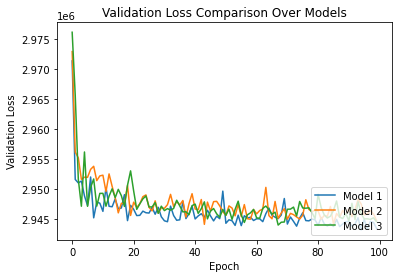

<Figure size 432x288 with 0 Axes>

In [29]:
kf_white = KFold(n_splits = 5, shuffle = True)
kf_white.get_n_splits(x)

plt.clf()
fold = 1

print(kf_white)
for train_index, test_index in kf_white.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # y_train = np.array([label_to_one_hot(i) for i in y_train])
    # y_test = np.array([label_to_one_hot(i) for i in y_test])
    
    fmodel1 = keras.Sequential([
        keras.layers.Dense(1000, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(500, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(250, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(50, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(1, activation= "linear")
    ])  
    fmodel1.compile(loss='mean_absolute_error',
        optimizer='adam',
        metrics=['mean_absolute_error'])
    
    fmodel2 = keras.Sequential([
        keras.layers.Dense(1000, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(500, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(500, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(250, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(250, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(50, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(1, activation= "linear")
    ])
    fmodel2.compile(loss='mean_absolute_error',
        optimizer='adam',
        metrics=['mean_absolute_error'])
    
    fmodel3 = keras.Sequential([
        keras.layers.Dense(1000, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(500, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(500, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(250, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(50, activation="relu", kernel_initializer=initializer),
        keras.layers.Dense(1, activation= "linear")
    ])
    fmodel3.compile(loss='mean_absolute_error',
        optimizer='adam',
        metrics=['mean_absolute_error'])


    h1 = fmodel1.fit(X_train, y_train, epochs = 100, verbose = 1)
    h2 = fmodel2.fit(X_train, y_train, epochs = 100, verbose = 1)
    h3 = fmodel3.fit(X_train, y_train, epochs = 100, verbose = 1)

    plt.plot(h1.history['loss'], label = "Model 1")
    plt.plot(h2.history['loss'], label = "Model 2")
    plt.plot(h3.history['loss'], label = "Model 3")

    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.title("Validation Loss Comparison Over Models")
    plt.legend(loc = "lower right")

    plt.savefig("dnnLossCV%d.png" %fold)
    plt.show()
    plt.clf()
    fold += 1